

1.   **FAVC**: Do you eat high caloric food frequently?

2.   **FCVC:** Do you usually eat vegetables in your meals?
3.   **NCP:** How many meals do you have daily?
4.  **CAEC:** Do you eat any food between meals?
5.  **SCC:**  Do you monitor the calories you eat daily?
6. **FAF:** How often fo you have physical activity?
7. **TUE:** How much time do you ise technological devices such as cell phone, videogames, television, computer and others?
8. **CALC:** How often do you drink alcohol?
9. **MTRANS:** Which transportation do you usually use?
10. **NObeyesdad ("Target"):** Obesity level



# Dataset Pre-processing

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')

# Exploratory Data Analysis

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.shape

(2111, 17)

In [6]:
df_uw = df.copy() #making a copy of dataset for analysis.

In [7]:
df.isnull().sum() #there are no null values in the dataset

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [8]:
df_uw.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Visualizations

In [9]:
numeric_df = df_uw.select_dtypes(include='number')

In [10]:
numeric_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


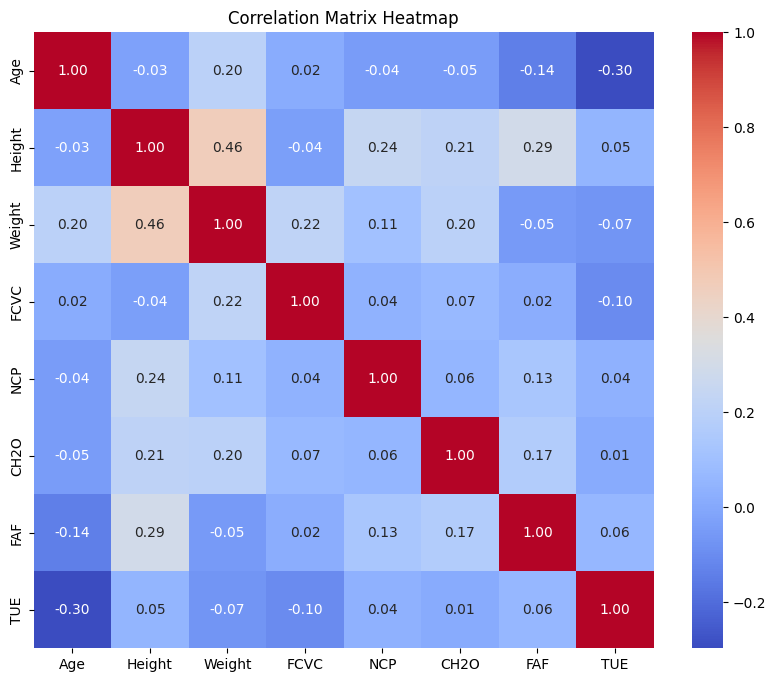

In [11]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

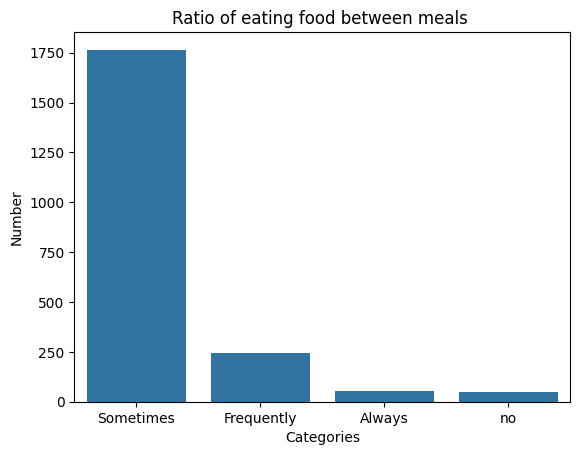

In [12]:

# Distribution of CAEC Values
sns.countplot(df_uw, x='CAEC')
plt.title('Ratio of eating food between meals ')
plt.xlabel('Categories')
plt.ylabel('Number')
plt.show()

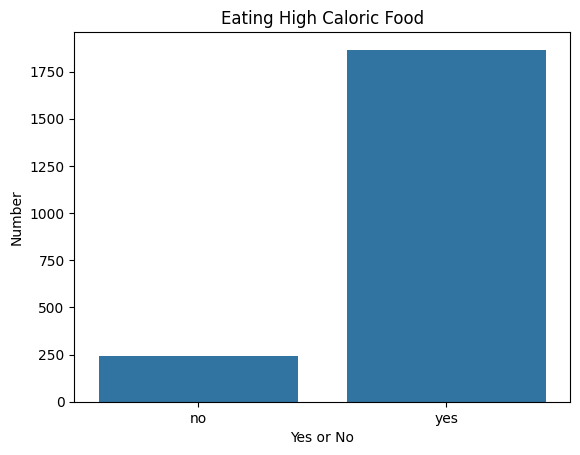

In [13]:
sns.countplot(df_uw, x='FAVC')
plt.title("Eating High Caloric Food")
plt.xlabel('Yes or No')
plt.ylabel("Number")
plt.show()

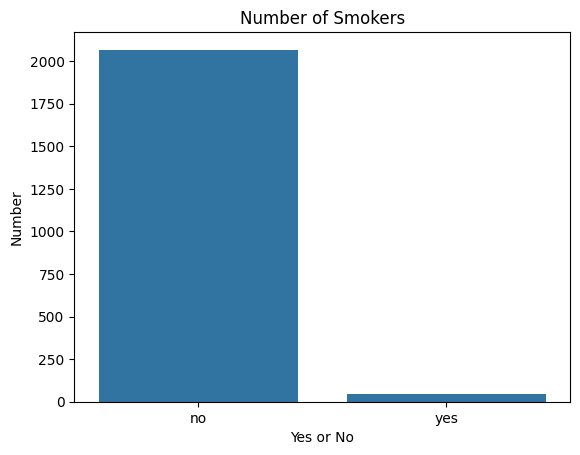

In [14]:
sns.countplot(df_uw, x='SMOKE')
plt.title("Number of Smokers")
plt.xlabel('Yes or No')
plt.ylabel("Number")
plt.show()


#plot shows that number of non-smokers is more than 2000, and smokers are around 100

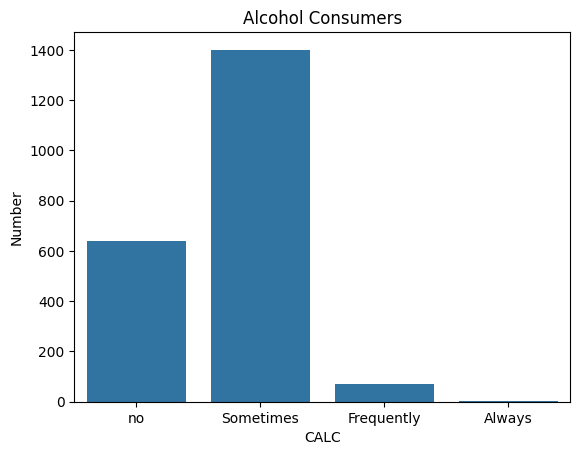

In [15]:
sns.countplot(df_uw, x='CALC')
plt.title("Alcohol Consumers")
#plt.xlabel('Yes or No')
plt.ylabel("Number")
plt.show()

#around 1390 individuals consumers alcohol sometimes, 600 individuals donot consume alcohol, very rare people consume alcohol.

In [16]:
df_uw.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
gender_age_grouped = df_uw.groupby('Gender')['SMOKE'].count()

In [18]:
print(gender_age_grouped)

Gender
Female    1043
Male      1068
Name: SMOKE, dtype: int64


In [19]:
df_uw['Gender'] = df_uw['Gender'].map({'Male': 1, 'Female': 0 })

In [20]:
df_uw['family_history_with_overweight'] = df_uw['family_history_with_overweight'].map({'yes': 1, 'no': 0 })

In [21]:
df_uw['FAVC'] = df_uw['FAVC'].map({'yes': 1, 'no': 0 })

In [22]:
df_uw['SMOKE'] = df_uw['SMOKE'].map({'yes': 1, 'no': 0 })

In [23]:
df_uw['SCC'] = df_uw['SCC'].map({'yes': 1, 'no': 0 })

In [24]:
df_uw.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
df_uw['CAEC'].value_counts()

,count
CAEC,
Sometimes,1765
Frequently,242
Always,53
no,51


In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
categories = [['no', 'Sometimes', 'Frequently', 'Always']]

In [28]:
encoder = OrdinalEncoder(categories= categories)

In [29]:
df_uw['CAEC'] = encoder.fit_transform(df_uw[['CAEC']])

In [30]:
df_uw['CALC'] = encoder.fit_transform(df_uw[['CALC']])

In [31]:
categories_mtrans = [['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike' ]]

In [32]:
encoder = OrdinalEncoder(categories= categories_mtrans)

In [33]:
df_uw['MTRANS'] = encoder.fit_transform(df_uw[['MTRANS']])

In [34]:
df_uw.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,0.0,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,0.0,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,0.0,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,2.0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,0.0,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,1.0,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1.0,0,2.0,0,1.0,0.0,1.0,3.0,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1.0,0,2.0,0,3.0,0.0,1.0,0.0,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1.0,0,2.0,0,1.0,1.0,2.0,0.0,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1.0,0,2.0,0,1.0,1.0,0.0,0.0,Normal_Weight


In [35]:
X = df_uw.drop(columns = ['NObeyesdad'])

In [36]:
y = df_uw['NObeyesdad']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'C': [0.2, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV with the defined parameter grid and classifier
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test data using the best model
best_svm_classifier = grid_search.best_estimator_
y_pred_best = best_svm_classifier.predict(X_test)

# Evaluate the performance of the best model
print("Best SVM Classifier Performance:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test Accuracy Score:", test_accuracy)

In [ ]:
print("Test Score: {:.2f}".format(long))